In [ ]:
!pip install opendatasets
!pip install pandas

In [ ]:
import opendatasets as od
import pandas

od.download(
    "https://www.kaggle.com/datasets/birdy654/eeg-brainwave-dataset-feeling-emotions")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rishikgupta28
Your Kaggle Key: ··········


100%|██████████| 11.9M/11.9M [00:00<00:00, 36.4MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import signal
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import random

In [ ]:
data = pd.read_csv('/content/eeg-brainwave-dataset-feeling-emotions/emotions.csv')

In [ ]:
data.head(3)

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.07,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.0,-162.0,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.55,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.6,-31.6,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.90,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.0,-148.0,281.00,POSITIVE


In [ ]:
label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}
data['label'] = data['label'].map(label_mapping)

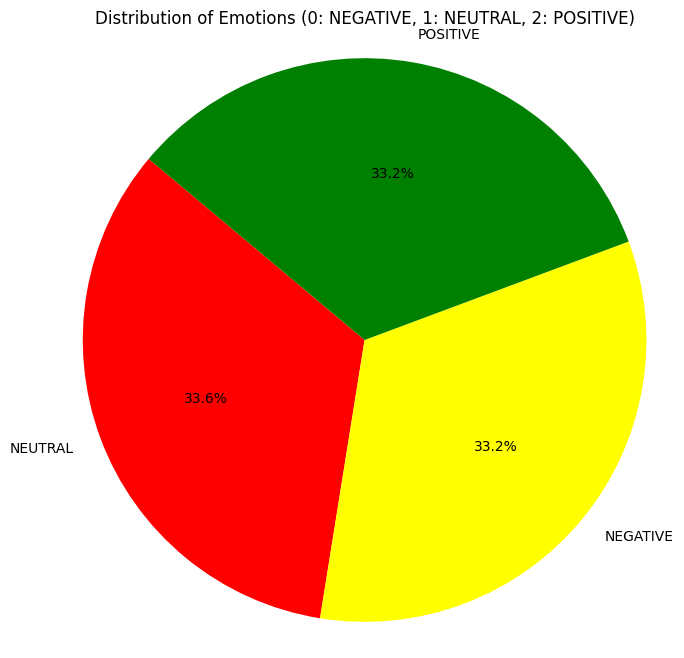

In [ ]:
emotion_counts = data['label'].value_counts()
emotional_labels = {0: 'NEGATIVE', 1: 'NEUTRAL', 2: 'POSITIVE'}
emotion_labels = [emotional_labels[label] for label in emotion_counts.index]

plt.figure(figsize=(8, 8))
plt.pie(emotion_counts, labels=emotion_labels, autopct='%1.1f%%', startangle=140, colors=['red', 'yellow', 'green'])
plt.title("Distribution of Emotions (0: NEGATIVE, 1: NEUTRAL, 2: POSITIVE)")
plt.axis('equal')

plt.show()


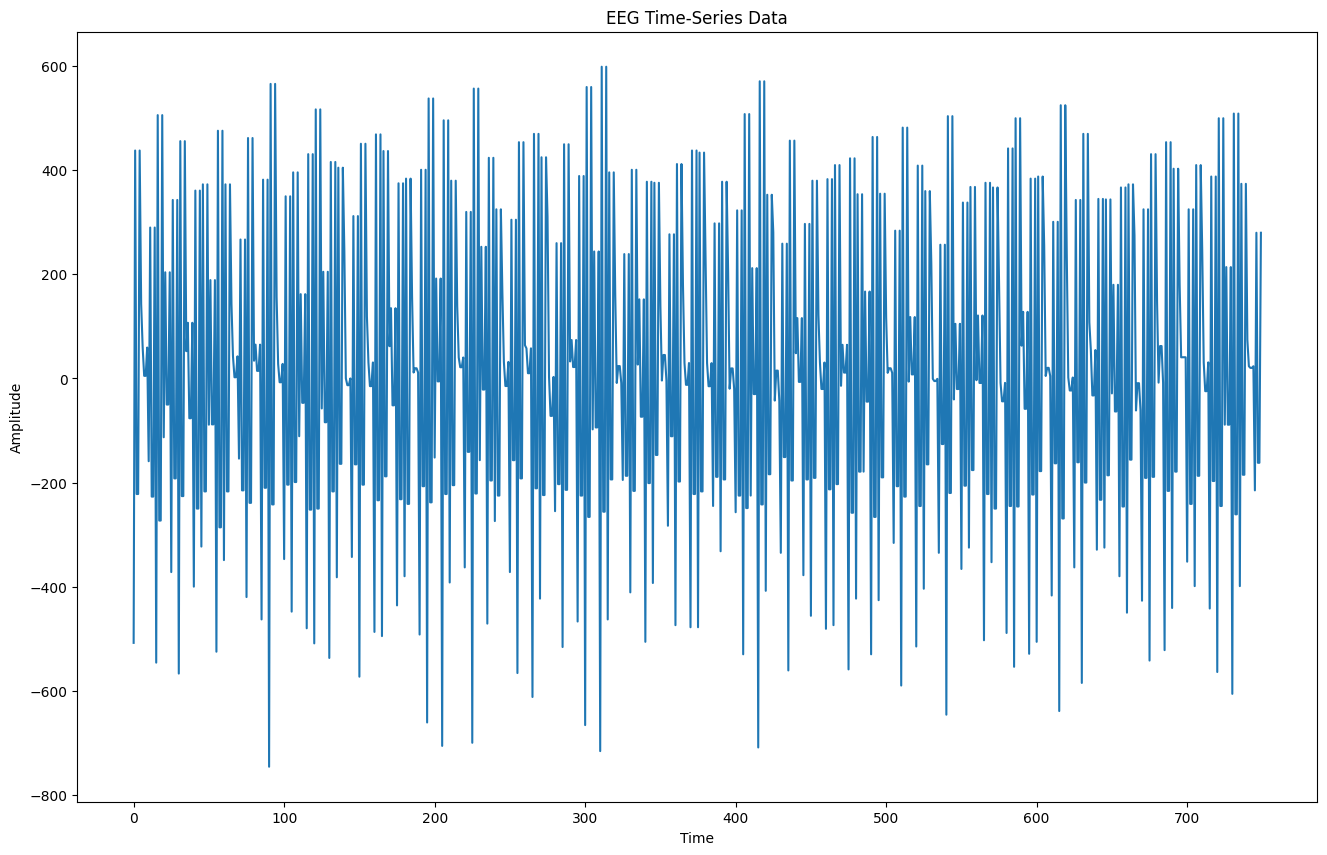

In [ ]:
sample = data.loc[0, 'fft_0_b':'fft_749_b']
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample)), sample)
plt.title("EEG Time-Series Data")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

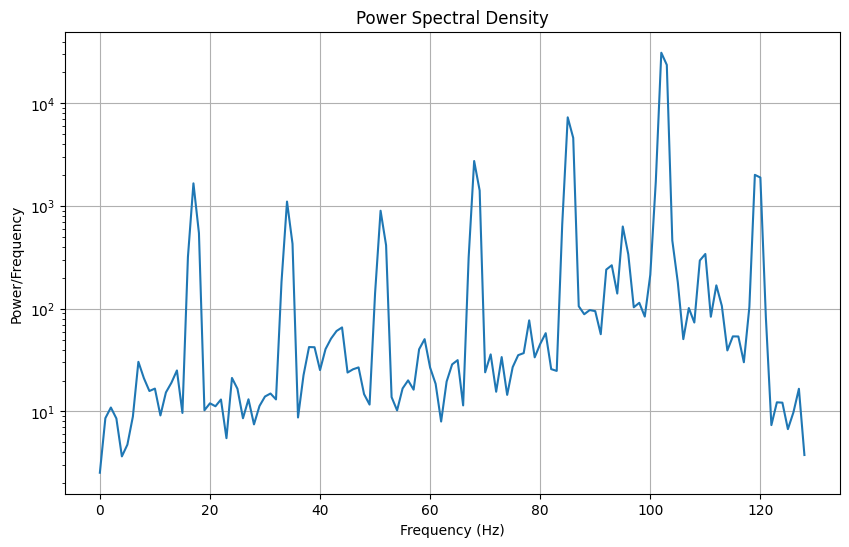

In [ ]:
sampling_rate = 256

frequencies, power_density = signal.welch(sample, fs=sampling_rate)
plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, power_density)
plt.title("Power Spectral Density")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power/Frequency")
plt.grid()
plt.show()

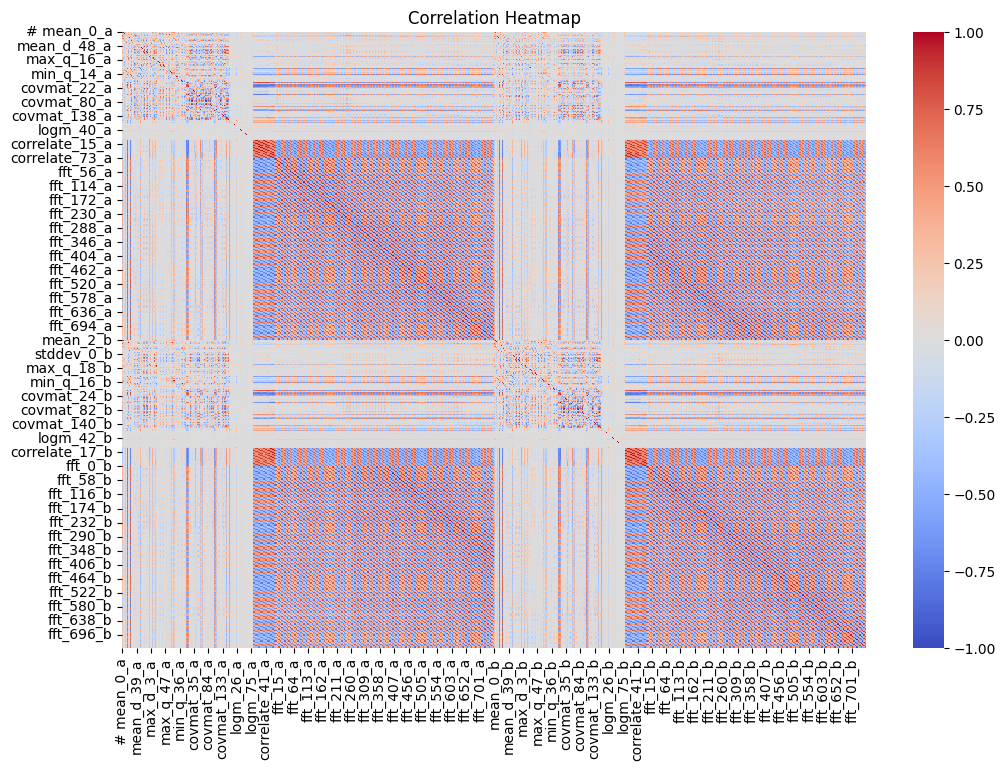

In [ ]:
correlation_matrix = data.drop('label', axis=1).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

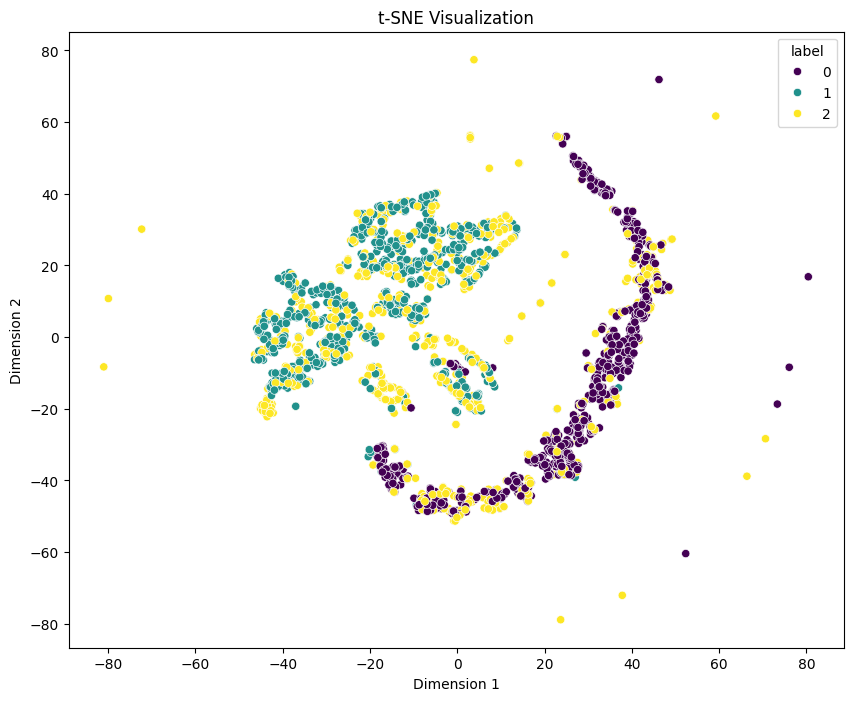

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(data.drop('label', axis=1))
tsne_df = pd.DataFrame(tsne_results, columns=['Dimension 1', 'Dimension 2'])
tsne_df['label'] = data['label']
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='label', data=tsne_df, palette='viridis')
plt.title("t-SNE Visualization")
plt.show()

In [ ]:
emotions = data['label'].unique()

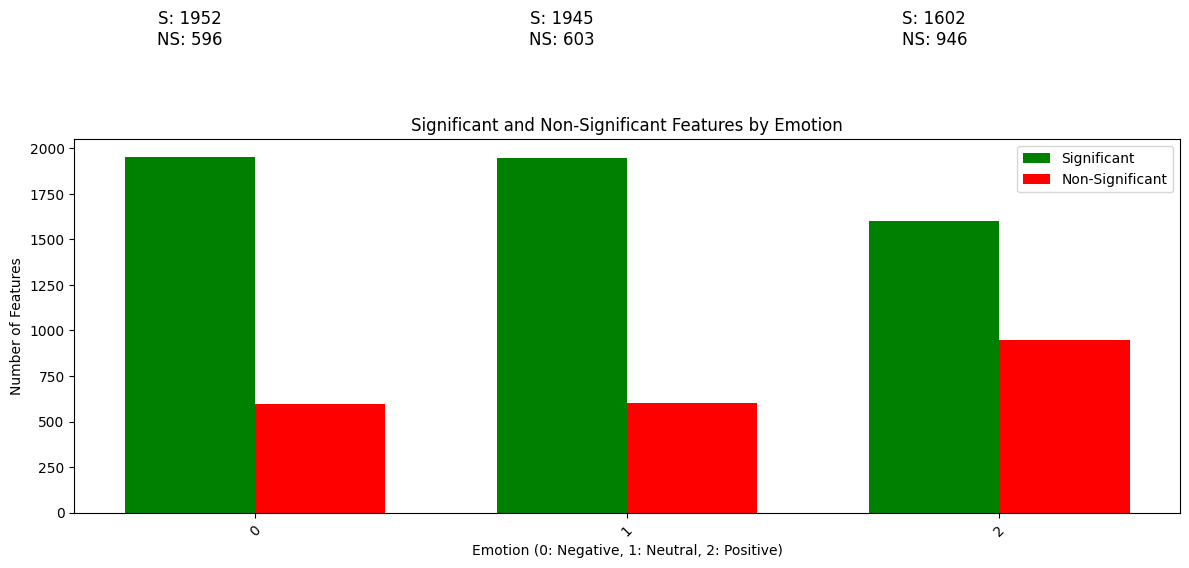

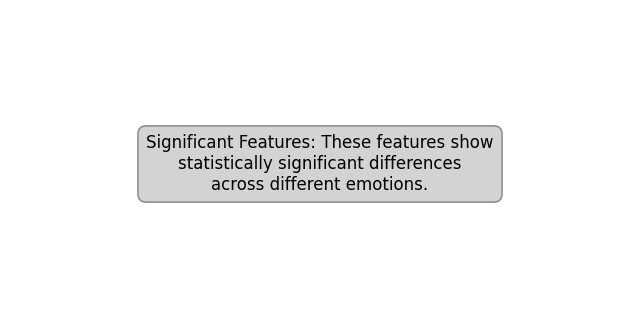

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

significant_color = 'green'
non_significant_color = 'red'

num_features = {emotion: {'significant': 0, 'non-significant': 0} for emotion in emotions}

for emotion in emotions:
    subset = data[data['label'] == emotion]
    for feature in data.columns[:-1]:
        _, p_value = ttest_ind(subset[feature], data[feature])
        if p_value < 0.05:
            num_features[emotion]['significant'] += 1
        else:
            num_features[emotion]['non-significant'] += 1

emotion_labels = list(num_features.keys())
significant_counts = [num_features[emotion]['significant'] for emotion in emotion_labels]
non_significant_counts = [num_features[emotion]['non-significant'] for emotion in emotion_labels]

plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(emotion_labels))

plt.bar(index, significant_counts, bar_width, label='Significant', color=significant_color)
plt.bar(index + bar_width, non_significant_counts, bar_width, label='Non-Significant', color=non_significant_color)

plt.xlabel('Emotion (0: Negative, 1: Neutral, 2: Positive)')
plt.ylabel('Number of Features')
plt.title('Significant and Non-Significant Features by Emotion')
plt.xticks(index + bar_width / 2, emotion_labels)
plt.legend()

for i, (significant_count, non_significant_count) in enumerate(zip(significant_counts, non_significant_counts)):
    plt.text(i, significant_count + non_significant_count + 1, f'S: {significant_count}\nNS: {non_significant_count}', ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()

plt.figure(figsize=(8, 4))
plt.text(0.5, 0.5, 'Significant Features: These features show\nstatistically significant differences\nacross different emotions.',
         ha='center', va='center', fontsize=12, bbox=dict(facecolor='lightgray', edgecolor='gray', boxstyle='round,pad=0.5'))
plt.axis('off')

plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
!export XLA_FLAGS=--xla_gpu_cuda_data_dir=/usr/lib/cuda
from tensorflow.keras.layers import Input, Conv1D, Reshape, Dense, Lambda,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

X = data.iloc[:, :-1]
y = data['label']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6969)

input_shape = (2548, 1)
input_layer = Input(shape=input_shape)

conv1_params = {
    "filters":256,
    "kernel_size":11,
    "strides": 1,
    "padding": "valid",
    "activation": "softmax"
}
primary_caps = Conv1D(**conv1_params)(input_layer)

primary_caps_reshaped = Reshape((-1, 256))(primary_caps)

num_capsule = 5
dim_capsule = 16
capsule_layer = Dense(num_capsule * dim_capsule, activation="relu")(primary_caps_reshaped)

capsule_layer_flattened = Flatten()(capsule_layer)

def squash(x, axis=-1):
    squared_norm = tf.reduce_sum(tf.square(x), axis, keepdims=True)
    scale = squared_norm / (1 + squared_norm)
    return scale * x

capsule_layer_squashed = Lambda(squash)(capsule_layer_flattened)
output_layer = Dense(3, activation='softmax')(capsule_layer_squashed)

capsule_net = Model(inputs=input_layer, outputs=output_layer)

capsule_net.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

capsule_net.summary()

epochs = 10
batch_size = 32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train = y_train.astype('int32')
y_test = y_test.astype('int32')
capsule_net.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2548, 1)]         0         
                                                                 
 conv1d (Conv1D)             (None, 2538, 256)         3072      
                                                                 
 reshape (Reshape)           (None, 2538, 256)         0         
                                                                 
 dense (Dense)               (None, 2538, 80)          20560     
                                                                 
 flatten (Flatten)           (None, 203040)            0         
                                                                 
 lambda (Lambda)             (None, 203040)            0         
                                                                 
 dense_1 (Dense)             (None, 3)                 609123

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
!export XLA_FLAGS=--xla_gpu_cuda_data_dir=/usr/lib/cuda
from tensorflow.keras.layers import Input, Conv1D, Reshape, Dense, Lambda,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

X = data.iloc[:, :-1]
y = data['label']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6969)

input_shape = (2548, 1)
input_layer = Input(shape=input_shape)

conv1_params = {
    "filters":256,
    "kernel_size":11,
    "strides": 1,
    "padding": "valid",
    "activation": "softmax"
}
primary_caps = Conv1D(**conv1_params)(input_layer)

primary_caps_reshaped = Reshape((-1, 256))(primary_caps)

num_capsule = 5
dim_capsule = 16
capsule_layer = Dense(num_capsule * dim_capsule, activation="relu")(primary_caps_reshaped)

capsule_layer_flattened = Flatten()(capsule_layer)

def squash(x, axis=-1):
    squared_norm = tf.reduce_sum(tf.square(x), axis, keepdims=True)
    scale = squared_norm / (1 + squared_norm)
    return scale * x

capsule_layer_squashed = Lambda(squash)(capsule_layer_flattened)
output_layer = Dense(3, activation='softmax')(capsule_layer_squashed)

capsule_net = Model(inputs=input_layer, outputs=output_layer)

capsule_net.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

capsule_net.summary()

epochs = 10
batch_size = 32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train = y_train.astype('int32')
y_test = y_test.astype('int32')
capsule_net.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2548, 1)]         0         
                                                                 
 conv1d_1 (Conv1D)           (None, 2538, 256)         3072      
                                                                 
 reshape_1 (Reshape)         (None, 2538, 256)         0         
                                                                 
 dense_2 (Dense)             (None, 2538, 80)          20560     
                                                                 
 flatten_1 (Flatten)         (None, 203040)            0         
                                                                 
 lambda_1 (Lambda)           (None, 203040)            0         
                                                                 
 dense_3 (Dense)             (None, 3)                 6091

# **With Implemented dynamic routing**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, Reshape, Dense, Lambda, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

def squash(vectors, axis=-1):
    squared_norm = tf.reduce_sum(tf.square(vectors), axis=axis, keepdims=True)
    safe_norm = tf.sqrt(squared_norm + 1e-9)
    squash_factor = squared_norm / (1. + squared_norm)
    unit_vector = vectors / safe_norm
    return squash_factor * unit_vector

X = data.iloc[:, :-1]
y = data['label']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6969)

input_shape = (2548, 1)
input_layer = Input(shape=input_shape)

conv1_params = {
    "filters": 256,
    "kernel_size": 11,
    "strides": 1,
    "padding": "valid",
    "activation": "relu"
}
primary_caps = Conv1D(**conv1_params)(input_layer)

primary_caps_reshaped = Reshape((-1, 256))(primary_caps)

num_capsule = 5
dim_capsule = 16
routing_iterations = 3

capsule_layer = Dense(num_capsule * dim_capsule, activation="relu")(primary_caps_reshaped)

for _ in range(routing_iterations):
    capsule_layer_squashed = Lambda(squash)(capsule_layer)
    weights = tf.keras.layers.Softmax(axis=2)(capsule_layer_squashed)
    weighted_sum = tf.reduce_sum(weights * capsule_layer_squashed, axis=1, keepdims=True)
    capsule_layer = 0.85 * capsule_layer + 0.15 * squash(weighted_sum)

capsule_layer_flattened = Flatten()(capsule_layer)
output_layer = Dense(3, activation='softmax')(capsule_layer_flattened)

capsule_net = Model(inputs=input_layer, outputs=output_layer)

capsule_net.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

capsule_net.summary()

epochs = 10
batch_size = 32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train = y_train.astype('int32')
y_test = y_test.astype('int32')
capsule_net.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 2548, 1)]            0         []                            
                                                                                                  
 conv1d_2 (Conv1D)           (None, 2538, 256)            3072      ['input_3[0][0]']             
                                                                                                  
 reshape_2 (Reshape)         (None, 2538, 256)            0         ['conv1d_2[0][0]']            
                                                                                                  
 dense_4 (Dense)             (None, 2538, 80)             20560     ['reshape_2[0][0]']           
                                                                                            

In [ ]:
predictions = capsule_net.predict(X)

predicted_labels = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, predicted_labels)

print(f'Accuracy: {accuracy * 100:.2f}%')


67/67 [==============================] - 12s 173ms/step
Accuracy: 99.25%


In [ ]:
cm = confusion_matrix(y, predicted_labels)
clr = classification_report(y, predicted_labels, target_names=label_mapping.keys())

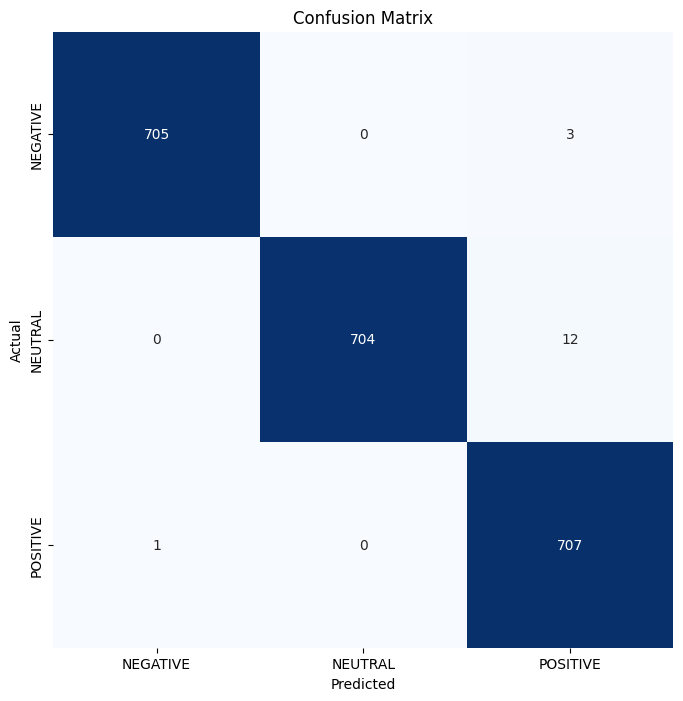

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print("Classification Report:\n", clr)

Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       1.00      1.00      1.00       708
     NEUTRAL       1.00      0.98      0.99       716
    POSITIVE       0.98      1.00      0.99       708

    accuracy                           0.99      2132
   macro avg       0.99      0.99      0.99      2132
weighted avg       0.99      0.99      0.99      2132



In [ ]:
import random
random.seed(356)
emotion_labels = {0: 'NEGATIVE', 1: 'NEUTRAL', 2: 'POSITIVE'}

for i in range(6, 8):
    random_index = random.randint(0, len(x_test) - 1)
    sample_input = x_test.iloc[random_index].values.reshape(1, -1)
    true_label = y_test.iloc[random_index]
    true_emotion = emotion_labels.get(true_label, 'Unknown')

    predicted_emotion = capsule_net.predict(sample_input)
    predicted_label = emotion_labels[np.argmax(predicted_emotion)]

    print(f"Sample {i}: Real Emotion Label: {true_emotion}, Predicted Emotion Label: {predicted_label}")

1/1 [==============================] - 0s 159ms/step
Sample 6: Real Emotion Label: POSITIVE, Predicted Emotion Label: POSITIVE
1/1 [==============================] - 0s 21ms/step
Sample 7: Real Emotion Label: NEUTRAL, Predicted Emotion Label: NEUTRAL


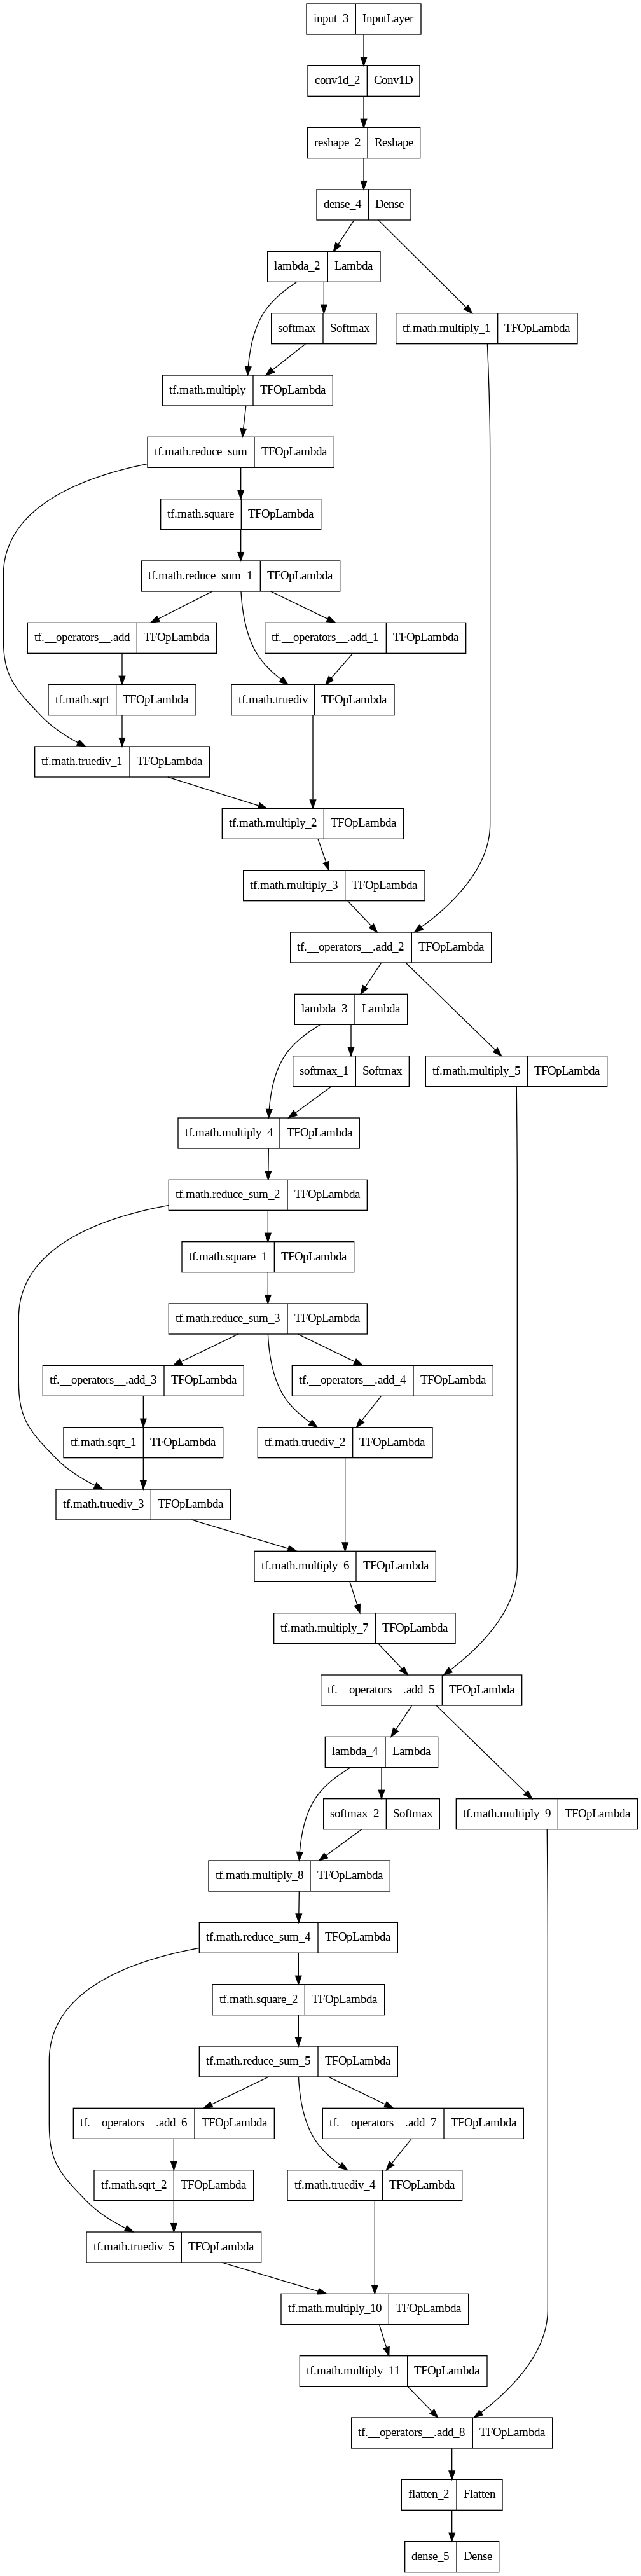

In [ ]:
tf.keras.utils.plot_model(capsule_net)